# Thema (C)NN werkcollege 1
### Objectherkenning met een neuraal netwerk

In dit college gaan we bezig met het voorspellen van afbeeldingen m.b.v. een simpel neuraal netwerk. We gebruiken de theorie uit de kennisbasis en gaan deze stapsgewijs toepassen op deze casus. Benodigde voorbereiding van deze les is het bestuderen van les 1 uit de kennisbasis en het installeren van Keras.

Nu is het herkennen van 10 mogelijke handgeschreven cijfers zoals in de uitleg op de elo relatief simpel, vooral omdat we geen andere informatie in het plaatje hebben dan alleen het cijfer. We gaan het daarom hier een klein beetje ingewikkelder maken en gebruiken hier de bij Keras meegeleverde CIFAR-10 dataset. Deze dataset bevat 60.000 afbeeldingen (50.000 train en 10.000 test) verdeeld over 10 verschillende klassen ['vliegtuig', 'auto', 'vogel', 'kat', 'hert','hond', 'kikker', 'paard', 'boot', 'vrachtwagen']. Iedere klasse bevat 6.000 afbeeldingen van 32 bij 32 pixels.

## Business understanding
In dit geval hebben we geen heel expliciete vraag uit de business maar in diverse disciplines is het van belang om verschillende vaak context specifieke objecten te kunnen herkennen. Denk bijv aan een autonoom rijdende auto die een fiets van een motor moet kunnen onderscheiden om de snelheid goed te kunnen inschatten

## Data understanding
We beginnen met het importeren van Keras en de dataset:

In [1]:
#import data (code gegeven)
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


Als alles goed is gegaan kunnen we zien dat train-images betaat uit 50.000 images van 32 x 32 pixels met 3 kleurkanalen. Voor de zekerheid controleren we alles nog even door de 1e 25 images weer te geven met pyplot en hier het juiste label in tekst onder te zetten. 

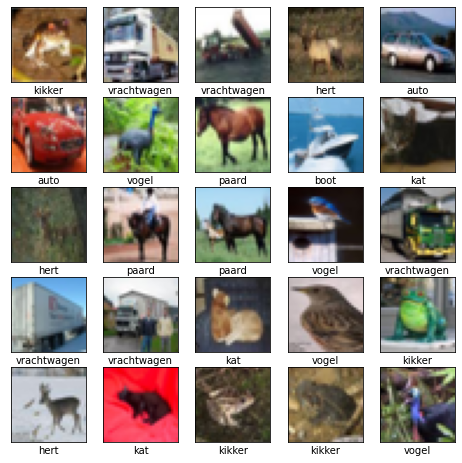

In [2]:
#toon de 1e 25 plaatjes met bijbehorende label (10 min)
import matplotlib.pyplot as plt

class_names = ['vliegtuig', 'auto', 'vogel', 'kat', 'hert',
               'hond', 'kikker', 'paard', 'boot', 'vrachtwagen']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)  #vul het i-e image
    plt.xticks([]) #geen schaal bij x-as
    plt.yticks([]) #geen schaal bij y-as
    plt.imshow(train_images[i]) 
    plt.xlabel(class_names[train_labels[i][0]]) 
plt.show()

## Data preparation

Nu we de data hebben ingelezen en hopelijk ook begrijpen kunnen we beginnen met de data preparation. Een neuraal netwerk bestaat uit 1 of meerdere Dense layers die een genormaliseerde vector verwachten.   

In [3]:
#Normaliseer de data en reshape de data naar een vector (10 min)

test_images_org=test_images.copy() #eerst even een backup van het origineel (aan het eind nodig)

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images.reshape((50000, 32*32*3)) #vector van 50000 x 3072 (32*32*3) maken

test_images = test_images.reshape((10000, 32*32*3)) #vector maken

train_images.shape

(50000, 3072)

Als het goed is hebben we nu 50.000 en 10.000 vectoren van 3072 (32x32x3) waarden. 

## Modeling
Nu kunnen we beginnen met het bouwen van ons eerste model wat hopelijk beter presteert dan volslagen willekeur. Omdat we toch ergens mee moeten beginnen nemen we het model uit de kennisbasis met twee hidden Dense layers van elk 16 neurons en relu als activation function als uitgangspunt. Zoek in de kennisbasis op hoeveel neurons de laatste laag moet hebben en wat de meest geschikte activation function voor de laatste laag is.

In [6]:
#definieer het model (2 min) en geef de summary.
model = models.Sequential([
    layers.Dense(16, activation="relu", input_shape=(32*32*3, )),
    layers.Dense(16, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                49168     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 49,610
Trainable params: 49,610
Non-trainable params: 0
_________________________________________________________________


Compile het model met de juiste optimizer, loss-functie en metrics

In [7]:
#compile het model (2 min)
model.compile(optimizer="ADAM",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Fit het model met de juiste datasets. Train 25 epochs. Bewaar de resultaten in een variabele (bijv history)

In [12]:
#fit model (5 min)
history=model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/25
196/196 [==============================] - 1s 7ms/step - loss: 2.0317 - accuracy: 0.1979 - val_loss: 2.0321 - val_accuracy: 0.1965
Epoch 2/25
196/196 [==============================] - 2s 8ms/step - loss: 2.0298 - accuracy: 0.1972 - val_loss: 2.0321 - val_accuracy: 0.1963
Epoch 3/25
196/196 [==============================] - 1s 7ms/step - loss: 2.0311 - accuracy: 0.1981 - val_loss: 2.0312 - val_accuracy: 0.1959
Epoch 4/25
196/196 [==============================] - 1s 7ms/step - loss: 2.0304 - accuracy: 0.1972 - val_loss: 2.0303 - val_accuracy: 0.1961
Epoch 5/25
196/196 [==============================] - 1s 8ms/step - loss: 2.0316 - accuracy: 0.1970 - val_loss: 2.0309 - val_accuracy: 0.1970
Epoch 6/25
196/196 [==============================] - 1s 7ms/step - loss: 2.0283 - accuracy: 0.1971 - val_loss: 2.0302 - val_accuracy: 0.1975
Epoch 7/25
196/196 [==============================] - 1s 7ms/step - loss: 2.0286 - accuracy: 0.1974 - val_loss: 2.0293 - val_accuracy: 0.1942
Epoch 

## Evaluation
Op basis van bovenstaande output kun je al concluderen dat ons model het nog niet heel erg goed doet. Voor de volledigheid plotten we de accurary en validated accuracy per epoch nog.

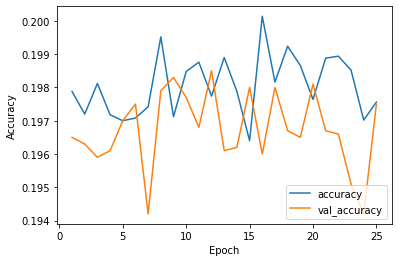

In [13]:
#plot de accuracy en validated accuracy (10 min)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(acc)+1)                        
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

We zien hier dat ons model het beter doet dan willekeur maar erg gelukkig worden we er nog niet van. Blijkbaar is het herkennen van hertjes en vliegtuigen toch wat complexer dan alleen maar cijfers herkennen (in de kennisbasis kwamen we met dit model al rond de 98 procent uit) We gaan daarom kijken of we niet wat hogere scores kunnen bereiken door extra layers en neurons toe te voegen.

## Modeling


In [14]:
# plenair wat mee spelen. (ca 20 min verschillende opties uitproberen)
# denk aan extra layers en meer neurons. 
model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(32*32*3, )),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(optimizer="ADAM",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
#fit model
history=model.fit(train_images, train_labels, batch_size=32, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
196/196 [==============================] - 1s 7ms/step - loss: 1.8223 - accuracy: 0.3381 - val_loss: 1.7436 - val_accuracy: 0.3647
Epoch 2/25
196/196 [==============================] - 1s 6ms/step - loss: 1.7204 - accuracy: 0.3751 - val_loss: 1.6736 - val_accuracy: 0.3977
Epoch 3/25
196/196 [==============================] - 1s 6ms/step - loss: 1.6394 - accuracy: 0.4088 - val_loss: 1.5975 - val_accuracy: 0.4205
Epoch 4/25
196/196 [==============================] - 1s 6ms/step - loss: 1.5817 - accuracy: 0.4265 - val_loss: 1.6022 - val_accuracy: 0.4342
Epoch 5/25
196/196 [==============================] - 1s 6ms/step - loss: 1.5377 - accuracy: 0.4450 - val_loss: 1.5219 - val_accuracy: 0.4573
Epoch 6/25
196/196 [==============================] - 1s 6ms/step - loss: 1.4993 - accuracy: 0.4608 - val_loss: 1.5258 - val_accuracy: 0.4602
Epoch 7/25
196/196 [==============================] - 1s 6ms/step - loss: 1.4765 - accuracy: 0.4684 - val_loss: 1.5149 - val_accuracy: 0.4508
Epoch 

## Evaluation: 

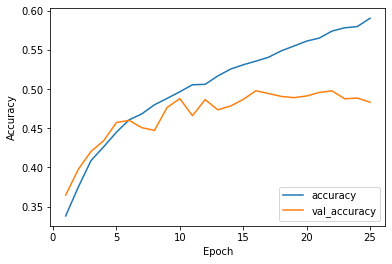

In [18]:
#plot de accuracy en validated accuracy 
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(acc)+1)                        
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

We zien nu dat het model langzamerhand wat beter begint te presteren, om beter te begrijpen waar het mis gaat gaan we eerst de confusion matrix afdrukken.

<AxesSubplot:>

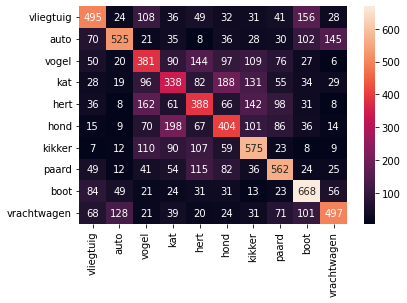

In [19]:
#print de confusion matrix (20 min) op basis van de test_dat

# Tip: standaard krijg je per afbeelding een array met 10 waarden terug (1 per klasse). 
# De hoogste waarde hiervan is de klasse (auto, vliegtuig etc.) met de grootste kans. 
# Hiervoor kun je argmax() gebruiken

from sklearn.metrics import confusion_matrix
Y_predict= []
predict=model.predict([test_images]) #2d array
for i in range (len(predict)):
    Y_predict.append(predict[i].argmax()) #omzetten zodat ik alleen de max waarde krijg
cm=confusion_matrix(test_labels,Y_predict)
#print(cm) #lelijk maar functioneel
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names) 
# fmt='g' om te voorkomen dat de wetenschappelijke notatie (3.7e+02) gebruikt.

De confusion matrix geeft ons al heel veel inzicht in wat er precies misgaat (Bijvoorbeeld dat relatief veel auto's voor een vrachtauto worden aangezien.) Soms helpt het echt ook om dingen te visualiseren. Daarom printen we de 1e 25 test afbeeldingen met hierbij de door ons model voorspelde waarden.

(25, 10)


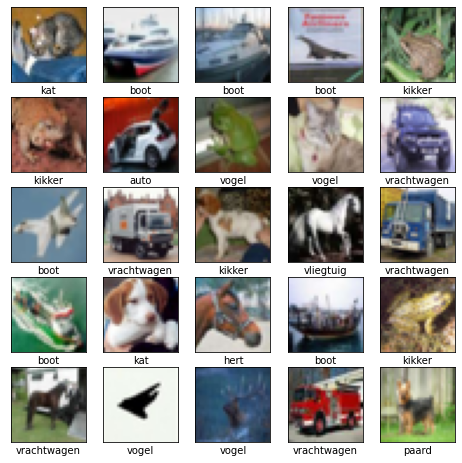

In [20]:
#print de 1e 25 plaatjes uit test_images en daarbij de voorspelde waarde. (15 min)

predict = model.predict(test_images[0:25]) #gegeven regel. Tip naar de output
print (predict.shape) #25, 10 dus 25 plaatjes met 10 labels per plaatje

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)  #vul het i-e image
    plt.xticks([]) #geen schaal bij x-as
    plt.yticks([]) #geen schaal bij y-as
    plt.imshow(test_images_org[i]) #orginele plaatjes nodig want de rest zit in een genormaliseerde vector
    plt.xlabel(class_names[predict[i].argmax()]) 
    #predict geeft een per image een array terug met kans per label. We willen de hoogste hebben daarom de argmax()
plt.show()

We zien nu een model wat ca de helft van de gevallen goed weet te voorspellen. Dit is al heel wat maar misschien nog niet helemaal wat we willen. Nu zien we ook (zeker als we meer epochs gaan draaien) dat het model ook steeds meer gaat overfitten. Probeer daarom verschillende waarden voor l1 en l2 om dit te voorkomen, zonder meteen je val_accuracy te laten instorten.  

## Modeling

In [21]:
#Probeer verschillende l1 en l2 waarden bij verschillende lagen (20 min)
from keras import regularizers
model = models.Sequential([
    #layers.Dense(128, kernel_regularizer=regularizers.l1(0.001), activation="relu", input_shape=(32*32*3, )),
    layers.Dense(128, kernel_regularizer=regularizers.l2(0.01), activation="relu", input_shape=(32*32*3, )),
    #layers.Dense(128, kernel_regularizer=regularizers.l1_l2(0.001), activation="relu", input_shape=(32*32*3, )),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [22]:
model.compile(optimizer="ADAM",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
#fit model
history=model.fit(train_images, train_labels, batch_size=32, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
196/196 [==============================] - 2s 8ms/step - loss: 1.9232 - accuracy: 0.3192 - val_loss: 1.8260 - val_accuracy: 0.3595
Epoch 2/25
196/196 [==============================] - 1s 7ms/step - loss: 1.8029 - accuracy: 0.3655 - val_loss: 1.7685 - val_accuracy: 0.3781
Epoch 3/25
196/196 [==============================] - 1s 7ms/step - loss: 1.7459 - accuracy: 0.3899 - val_loss: 1.7046 - val_accuracy: 0.4056
Epoch 4/25
196/196 [==============================] - 1s 7ms/step - loss: 1.6940 - accuracy: 0.4053 - val_loss: 1.6625 - val_accuracy: 0.4220
Epoch 5/25
196/196 [==============================] - 1s 7ms/step - loss: 1.6696 - accuracy: 0.4169 - val_loss: 1.6277 - val_accuracy: 0.4378
Epoch 6/25
196/196 [==============================] - 1s 7ms/step - loss: 1.6496 - accuracy: 0.4240 - val_loss: 1.6121 - val_accuracy: 0.4438
Epoch 7/25
196/196 [==============================] - 1s 6ms/step - loss: 1.6226 - accuracy: 0.4358 - val_loss: 1.6388 - val_accuracy: 0.4244
Epoch 

## Evaluation

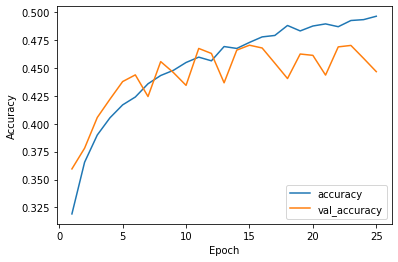

In [25]:
#plot de accuracy en validated accuracy
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(acc)+1)                        
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Over het algemeen zien we dat het toevoegen van de regulators het overfitten wel beperkt maar in dit geval al snel ten koste van de (validated) accuracy gaat

## Modeling / Evaluation
Probeer nu nog eens door wat meer te variëren in je netwerk je de val_accuracy nog wat op te krikken. Denk aan extra Denselayers, extra neurons etc. Het best scorende resultaat zullen we het laatste kwartier van de les bespreken. Eén spelregel, we gebruiken alleen Dense layers!

In [24]:
#meest optimale gevonden oplossing. 

In hoeverre is een dergelijk neuraal netwerk geschikt om objecten te herkennen en waarom? (geef je antwoord hieronder)

Aangezien het eigenlijk niet lukt om een werkbare accurary (vuistregel boven de 65%) te krijgen is een dergelijk neuraal netwerk eigenlijk niet geschikt om objecten mee te herkennen